In [1]:
#Math Part
import numpy as np
import pandas as pd

#Graph
import matplotlib.pyplot as plt

import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)

import pandas as pd
import time

def evol(output="sample_iot_result_n5.csv"):
    iot_data = pd.read_csv('sample_iot_data.csv')
    y = iot_data['pump'].values
    X = iot_data[['moisture','temp']].values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=2,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=50,lambda_=30, ngen=50)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

multi
gen	nevals	media 	std      	max	min  
0  	50    	0.9445	0.0317372	1  	0.825
1  	30    	0.9535	0.029159 	1  	0.825
2  	30    	0.9495	0.0322064	1  	0.825
3  	30    	0.947 	0.0298496	1  	0.85 
4  	30    	0.9525	0.0265754	1  	0.85 
5  	30    	0.947 	0.0326497	1  	0.825
6  	30    	0.949 	0.0295635	1  	0.85 
7  	30    	0.946 	0.0358329	1  	0.825
8  	30    	0.9515	0.0340624	1  	0.825
9  	30    	0.9545	0.0290215	1  	0.85 
10 	30    	0.946 	0.0329242	1  	0.85 
11 	30    	0.9435	0.0363352	1  	0.825
12 	30    	0.9435	0.0438207	1  	0.75 
13 	30    	0.9525	0.040078 	1  	0.75 
14 	30    	0.9575	0.030104 	1  	0.85 
15 	30    	0.94  	0.0360555	1  	0.825
16 	30    	0.9465	0.0346446	1  	0.825
17 	30    	0.9515	0.0325615	1  	0.825
18 	30    	0.95  	0.0269258	1  	0.875
19 	30    	0.95  	0.0282843	1  	0.875
20 	30    	0.941 	0.0330757	1  	0.875
21 	30    	0.9355	0.031261 	1  	0.875
22 	30    	0.934 	0.032311 	1  	0.875
23 	30    	0.939 	0.0339706	1  	0.875
24 	30    	0.9395	0.0353871	1  	0.875
25 	30

In [4]:
import encoding_2 as e2
import random
iot_result = pd.read_csv('sample_iot_result_n5.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','acc']
    dataframe.sort_values(['acc','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
iot_salidas # Queremos ver el primer circuito del dataframe yya ordenado por accuracy (mejor ind)

,ind,circ,gates,acc
0,7,0100110101101100001110110000001010101000101001...,3.333333,1.000
1,6,0100110101101010101110110000001010101000101001...,0.975313,0.975
2,5,0100110101101010101110110000001010101000101001...,0.951250,0.950
3,4,0100110101101010101110110000001010101000101001...,0.927813,0.925
4,0,0100110101101010101110110000001010101000101001...,0.861250,0.850
5,1,0100110101101010101110110000001010101000101001...,0.861250,0.850
6,2,0100110101101010101110110000001010101000101001...,0.861250,0.850
7,3,0100110101101010101110110000001010101000101001...,0.861250,0.850


['01001', '10101', '10110', '00011', '10110', '00000', '10101', '01000', '10100', '11011', '00001', '11011', '10101', '00011', '11010', '01110', '11100', '10111', '01010', '10111', '01000', '10000', '11000', '01011', '10111', '11001', '10010', '11100', '01010', '01110', '10100', '11001', '11011', '11001', '01000', '11001']
10.0


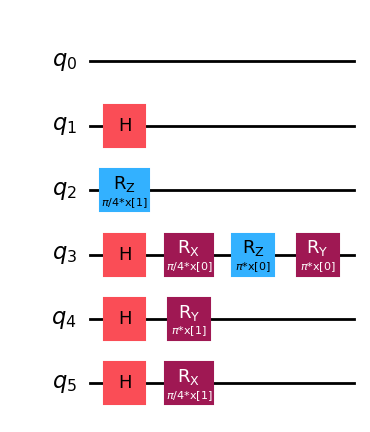

In [5]:
cc = e2.CircuitConversor(nqubits=6, nparameters=2)
fm, puertas = cc(e2. coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')